## Analysis of Class Labels (Diabetic Retinopathy Dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1- Class Distribution

In [87]:
# Load labels csv file

def preprocess_labels_csv(filename="trainLabels.csv", new_column_names=['patient_id', 'eye']):
    labels = pd.read_csv(filename)
    labels["image"] = labels["image"].str.split("_")
    labels[new_column_names] = pd.DataFrame(labels["image"].values.tolist(), index= labels.index)
    return labels


# Plot class distribution as count or percentage

def plot_class_dist(labels, percentage=False):
    g = labels.groupby('level').count()['eye']
    
    y_label = "Count"
    x_label = "Class (severity of Diabetic Retinopathy)"
    
    if (percentage):    
        size = g.sum()
        g = 100*g/size
        y_label = "Percentage"
        
    p = g.plot(kind='bar', title="Distribution of class labels")
    p.set_ylabel(y_label)
    p.set_xlabel(x_label)    

### Class distribution as Counts

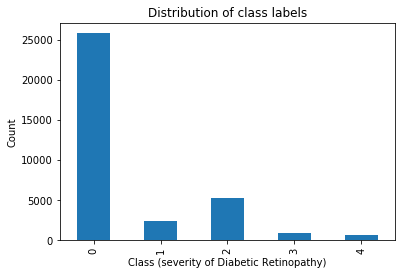

In [88]:
labels_df = preprocess_labels_csv()

plot_class_dist(labels_df)

### Class distribution as Percentage

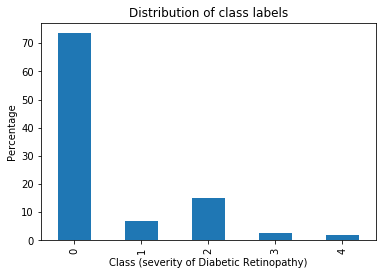

In [80]:
plot_class_dist(labels_df, True)

### Analysis of Difference in Diagnosis of a subject with the condition for each eye
For each subject, two images along with their labels are provided (left and right eye). The following analysis show some summaries whether the two eyes have the same exact diagnosis or not.

In [101]:
# Read and rearrange data, add columns to facilicate plotting

def rearrange_labels(path="trainLabels.csv"):
    train_df = pd.read_csv("trainLabels.csv")
    train_df['image_path'] = train_df['image'] + '.jpeg'
    train_df['image'] = train_df['image'].str.split('_')
    df2 = pd.DataFrame(train_df['image'].values.tolist(), columns=['subject', 'eye'])
    
    new_labels_df = pd.concat([train_df, df2], axis=1, join_axes=[train_df.index]).drop("image", axis=1) 
    
    g = new_labels_df.groupby('subject')
    df = g['level'].apply(list)

    new_df = pd.DataFrame(index=df.index)
    new_df['levels'] = df

    new_df = new_df.reset_index()
    final_df = pd.concat([pd.DataFrame(new_df.levels.tolist(), columns=["left", "right"]), new_df], axis=1, join_axes=[new_df.index])
    
    final_df['eyes_equal'] = np.where(final_df['left'] == final_df['right'], 1, 0)
    final_df['eyes_diff_value'] = np.abs(final_df['right'] - final_df['left'])

    final_df['diagnosed_left'] = np.where(final_df.left >= 1, 1, 0)
    final_df['diagnosed_right'] = np.where(final_df.right >= 1, 1, 0)
    
    final_df['eyes_same_diagnosis'] = np.where(final_df['diagnosed_left'] == final_df['diagnosed_right'], 1, 0)
    
    return  final_df


In [156]:
eyes_labels_df = rearrange_labels()

# Plotting function
def display_plot(df, variable, x_label="", show_numbers=False, color="darkgreen"):
    p = df.groupby(variable).count()['subject'].plot(kind='bar', color=color)
    p.set_ylabel("Count of Subjects")
    p.set_xlabel(x_label)
    if(show_numbers):
        for x in p.patches:
            p.annotate(str(int(x.get_height())), (x.get_x() + 0.1, x.get_height()*1.005))

#### Same exact diagnosis for both eyes


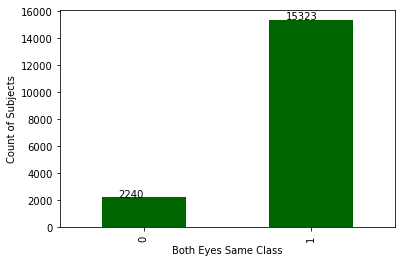

In [153]:
display_plot(eyes_labels_df, "eyes_equal", 
             x_label="Both Eyes Same Class", show_numbers=True)

#### Both eyes have the same condition
* 0 --> no condition
* 1 to 4 --> condition (with varying degree of severity)

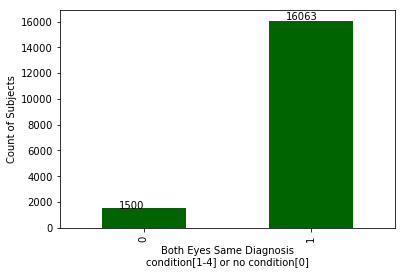

In [154]:
display_plot(eyes_labels_df, "eyes_same_diagnosis", 
             x_label="Both Eyes Same Diagnosis\ncondition[1-4] or no condition[0]", show_numbers=True)

#### Absolute difference between the classes for both eyes of the subject
* 0 --> exact diagnosis


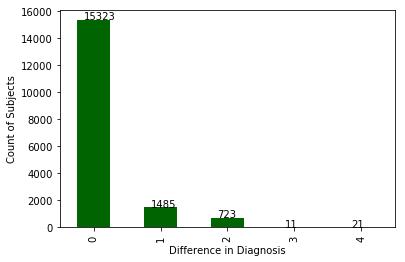

In [155]:
display_plot(eyes_labels_df, "eyes_diff_value", 
             x_label="Difference in Diagnosis", show_numbers=True)